# Домашнее задание. Решение конкурса на kaggle.com

1. Маунтим гугл драйв
2. Устанавливаем катбуст
3. Импорт библиотек

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

# Первая часть. Исследование

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 55.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 71.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 27.5MB/s]


In [ ]:
# Читаем данные
data_train = pd.read_csv('/content/drive/MyDrive/HW 3 Kaggle/train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/HW 3 Kaggle/test.csv')

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
# посмотрим на данные в интерактиве
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data_train)

https://docs.google.com/spreadsheets/d/1erPZNfoSSeKlApY8HDypj-Zx5YoivaVC2q1glqewDzI#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
# видим, что большая часть признаков не числового типа
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data_train.Sex.value_counts()

,count
Sex,
Male,2655
Female,2627


In [ ]:
# фича TotalSpent объектная, хотя имеет числовое значение --> переведем в числовую
data_train['TotalSpent'] = pd.to_numeric(data_train['TotalSpent'], errors='coerce')
data_test['TotalSpent'] = pd.to_numeric(data_train['TotalSpent'], errors='coerce')

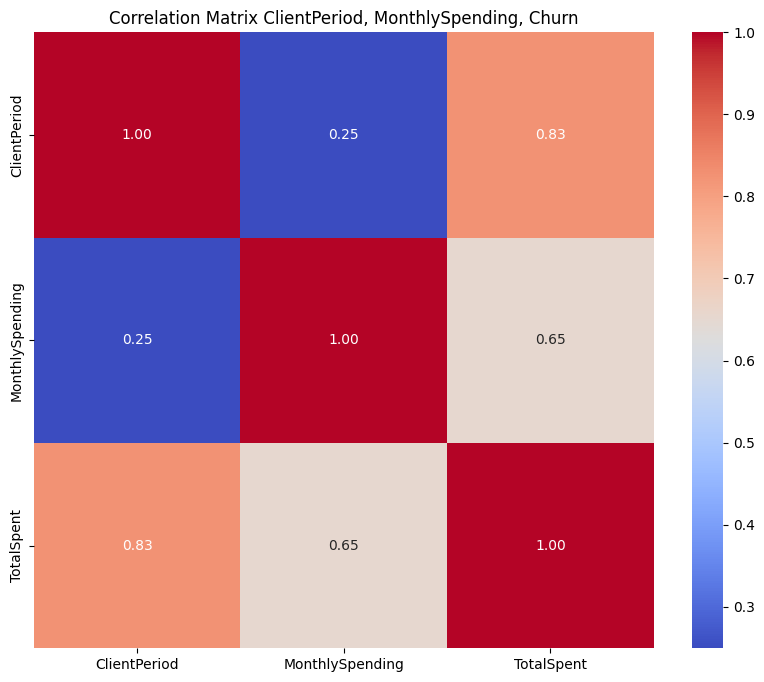

In [ ]:
# визуализация числовых признаков
plt.figure(figsize=(10, 8))
sns.heatmap(data_train[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix ClientPeriod, MonthlySpending, Churn')
plt.show()

❗ Высокая корреляция между MonthlySpending и TotalSpent 0.65 (логично), но это может быть проблемой. Также высокая корреляция между ClientPeriod и TotalSpent 0.83

In [ ]:
data_train[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5273.000000
mean,32.397009,64.924754,2291.390461
std,24.550326,30.176464,2269.014233
min,0.000000,18.250000,18.800000
25%,9.000000,35.462500,401.100000
50%,29.000000,70.400000,1410.250000
75%,55.000000,90.050000,3807.350000
max,72.000000,118.750000,8684.800000


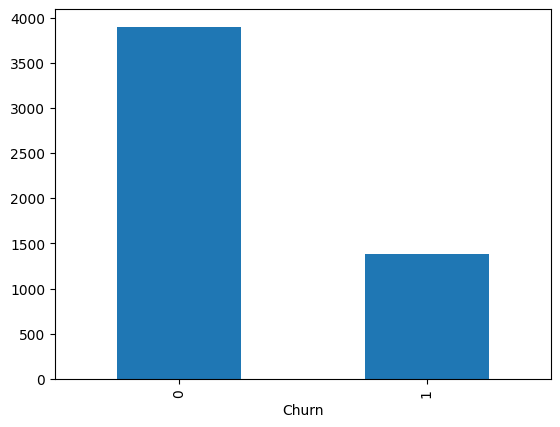

In [ ]:
# посмотрим, что происходит в целевой переменной
target_feature = data_train.Churn.value_counts()
bar_chart = target_feature.plot(kind='bar')

# видим, что целевая переменная разбалансирована --> хочу применить SMOTE позже.

In [ ]:
data_train[num_cols].isna().sum()
# в TotalSpent 9 NaN значений - не так много, думаю можно забить, ничего не потеряв - заменю на моду

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,9


In [ ]:
# заменили НаН значения на моду, медиана слишком высокая
data_train['TotalSpent'] = data_train['TotalSpent'].fillna(data_train['TotalSpent'].mode()[0])
data_test['TotalSpent'] = data_test['TotalSpent'].fillna(data_test['TotalSpent'].mode()[0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e716b3a5780>,
 'caps': [<matplotlib.lines.Line2D at 0x7e716b3a5cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e716b3a54e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7e716b3a6200>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e716b3a6470>,
 'means': []}

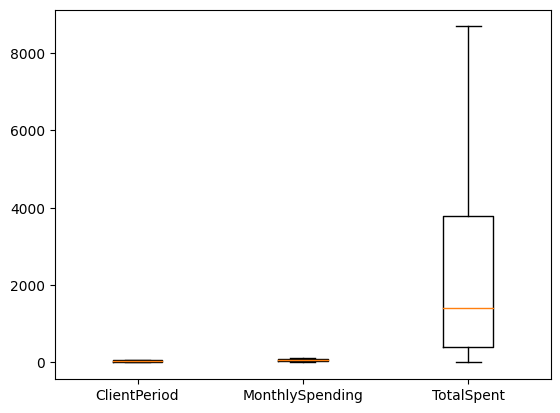

In [ ]:
# посмотрим на boxplot числовых признаков
plt.boxplot(data_train[num_cols], labels=data_train[num_cols].columns)

In [ ]:
data_train.TotalSpent.describe()

,TotalSpent
count,5282.000000
mean,2287.520579
std,2269.014643
min,18.800000
25%,395.725000
50%,1405.650000
75%,3795.212500
max,8684.800000


In [ ]:
data_train.query('TotalSpent > 3795.212500')
# 1321 семпл имеет TotalSpent выше 3-го квантиля, что-то убер дофига выбросов,
# если бы мы знали, что с этим делать, НО игнорить 1/3 выбросов точно нельзя

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
8,50,105.95,5341.80,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
11,70,113.05,7869.05,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
12,69,99.50,6841.45,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5267,72,112.25,8041.65,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
5268,72,117.50,8670.10,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5271,67,88.80,5903.15,Male,0,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),0
5273,60,104.35,6339.45,Male,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,0


In [ ]:
# порог 99-го квантиля
percentile_99 = data_train[num_cols].quantile(0.99)

# триммирование: заменим значения выше 99-го персентиля на сами пороговые значения

for col in num_cols:
    data_train[col] = np.where(data_train[col] > percentile_99[col], percentile_99[col], data_train[col])

data_train[num_cols].describe()
# таким образом мы немного снизили значимость выбросов в выборке, не сильно потеряв в данных, т.к взяли 99-й квантиль

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.911549,2284.674515
std,24.550326,30.154050,2261.557761
min,0.000000,18.250000,18.800000
25%,9.000000,35.462500,395.725000
50%,29.000000,70.400000,1405.650000
75%,55.000000,90.050000,3795.212500
max,72.000000,115.050000,8017.787500


{'whiskers': [<matplotlib.lines.Line2D at 0x7e716b13b1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e716b13b730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e716b13af50>,
 'medians': [<matplotlib.lines.Line2D at 0x7e716b13bc70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e716b13bf10>,
 'means': []}

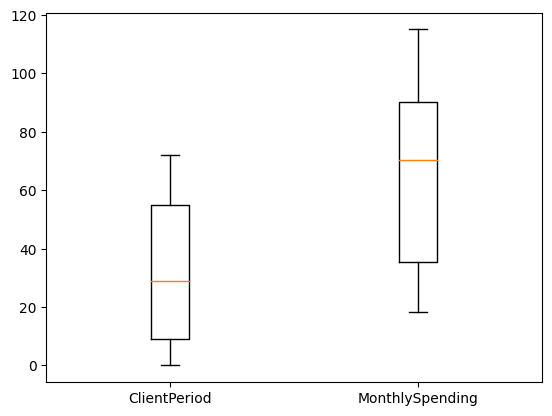

In [ ]:
plt.boxplot([data_train['ClientPeriod'], data_train['MonthlySpending']], labels=['ClientPeriod', 'MonthlySpending'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e716b1c33d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e716b1c3910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e716b1c3130>,
 'medians': [<matplotlib.lines.Line2D at 0x7e716b1c3e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e716b1f8130>,
 'means': []}

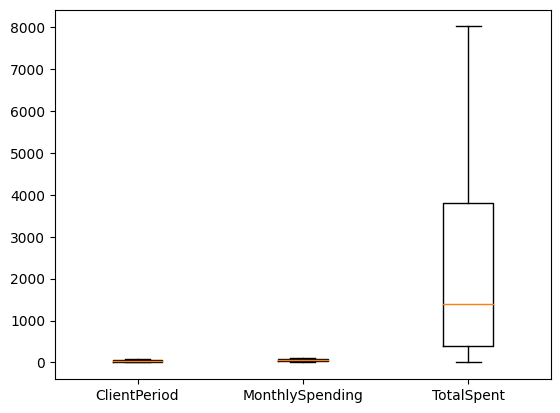

In [ ]:
plt.boxplot(data_train[num_cols], labels=data_train[num_cols].columns)
# макс выброс немного снизился - на 500 серебрянников

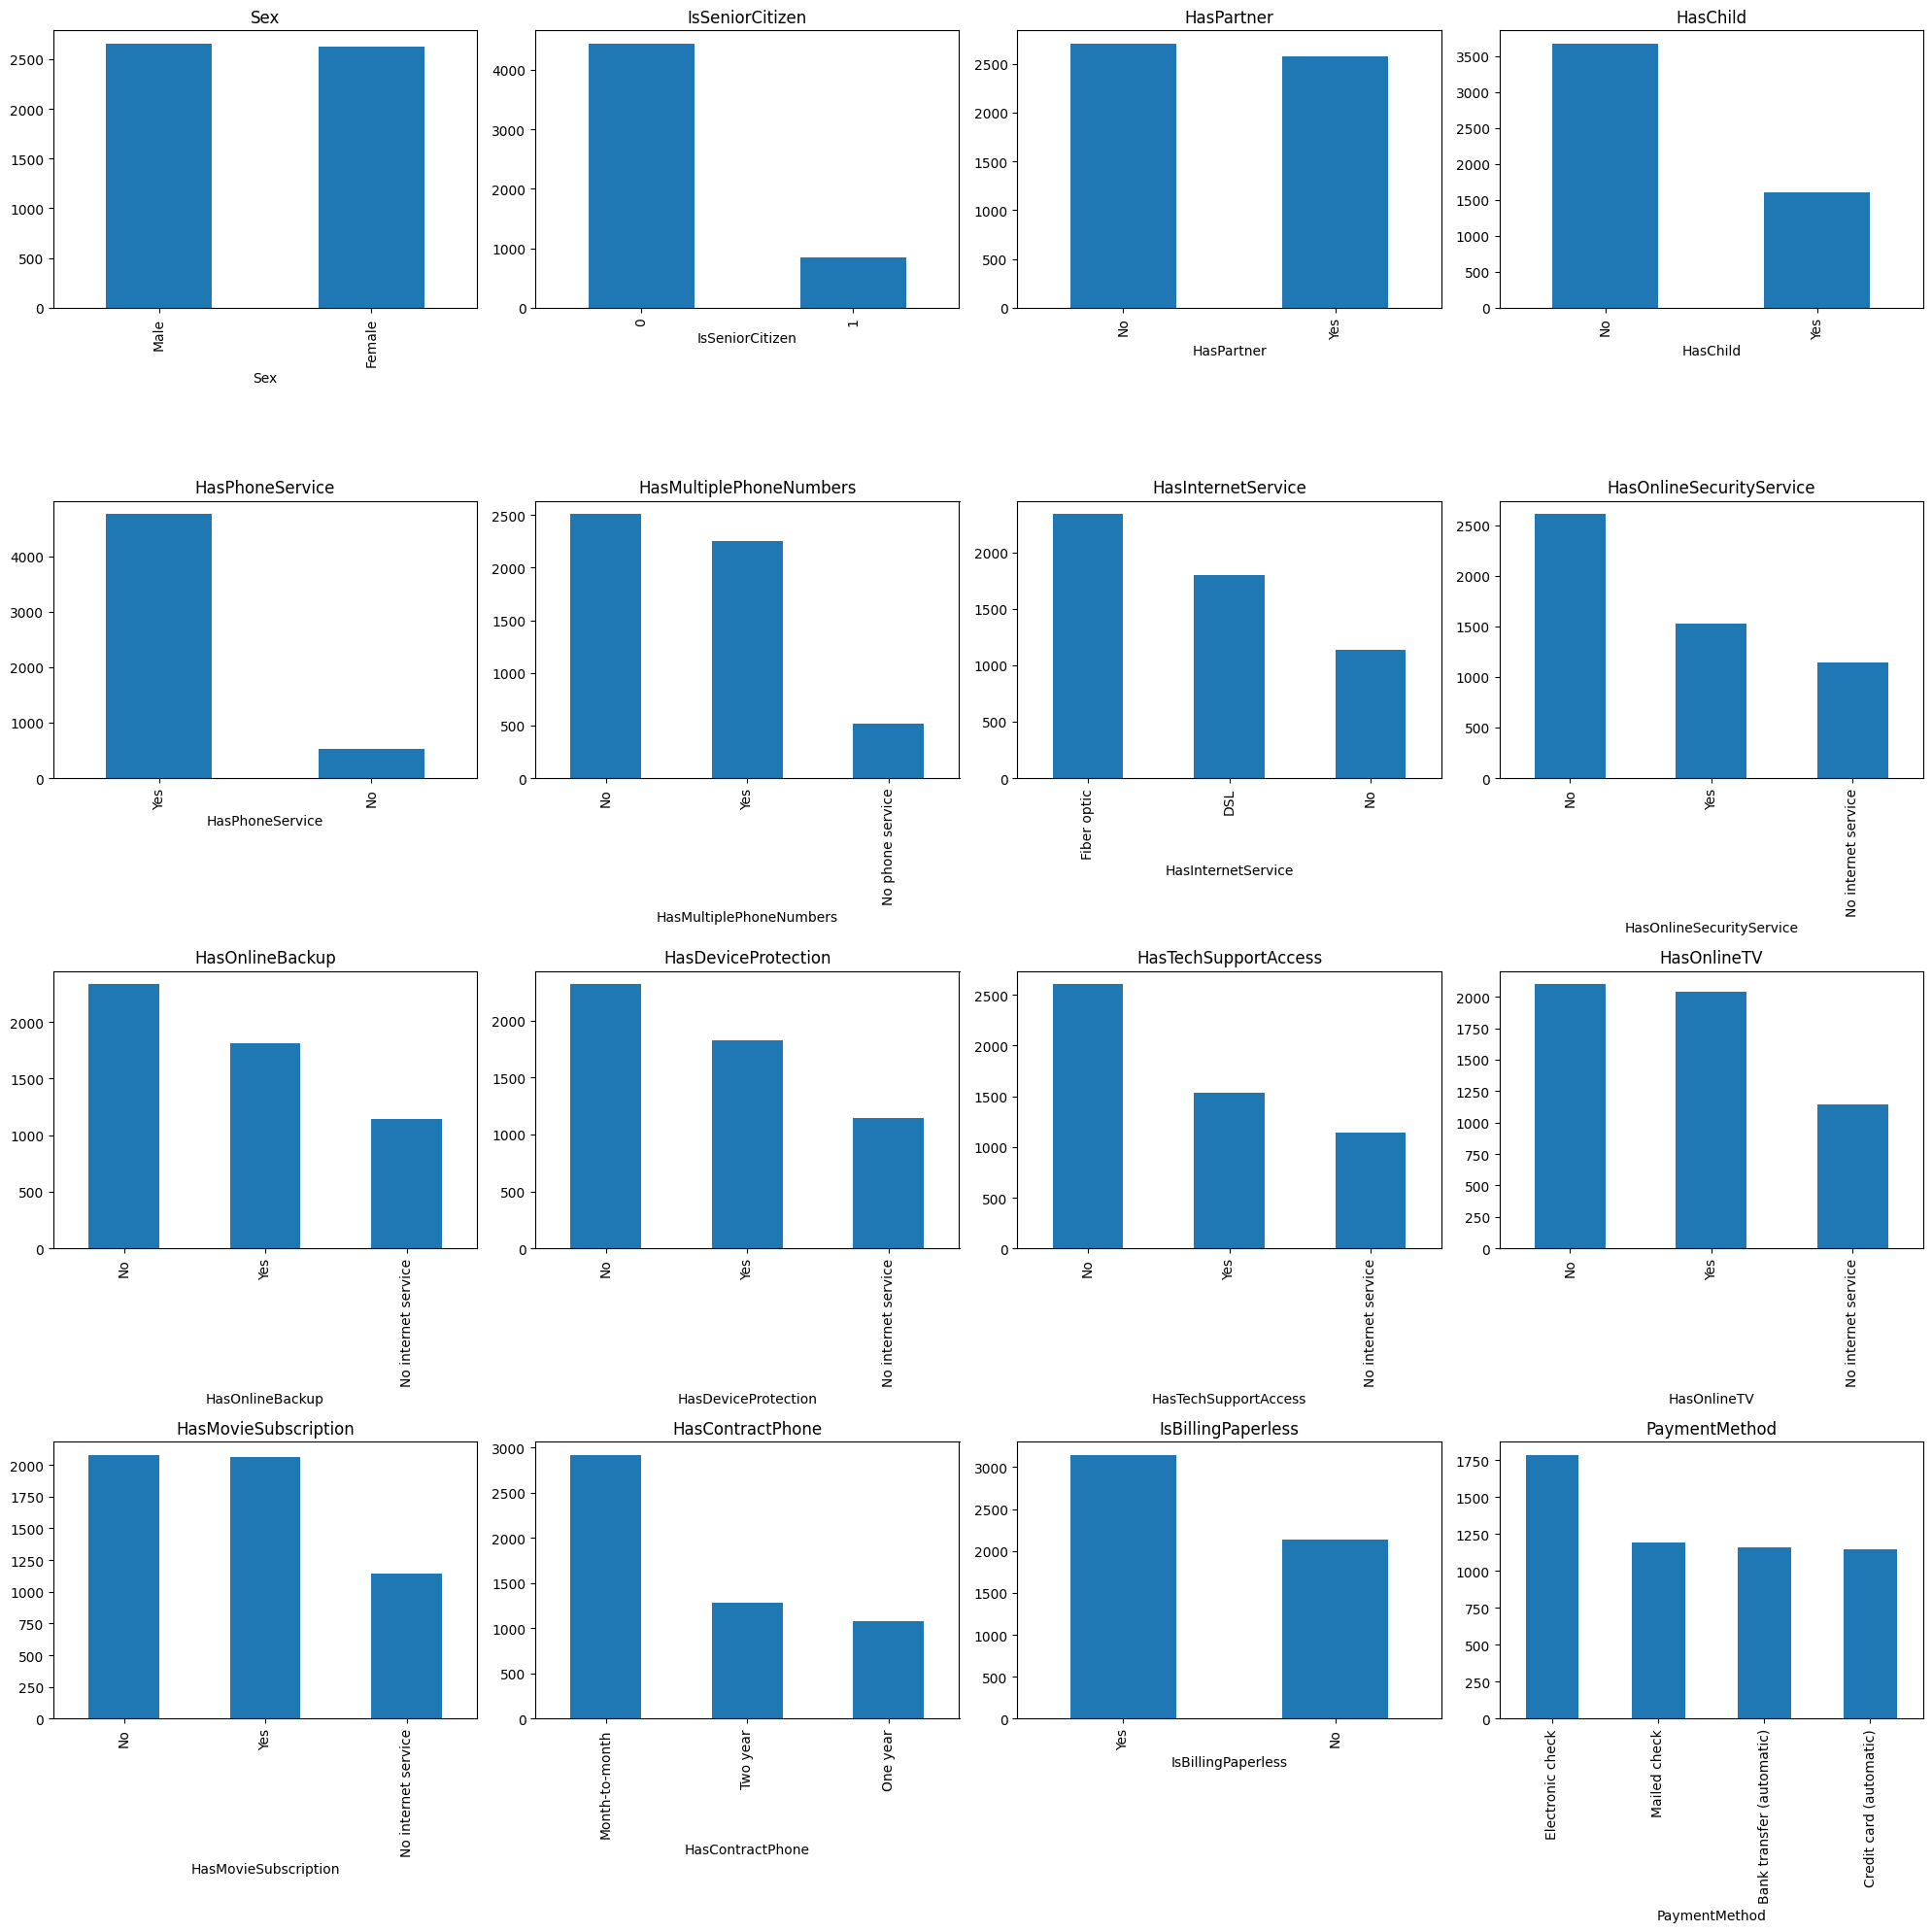

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
axes = axes.flatten()

# Проходим по категориальным признакам и создаем гистограммы
for i, col in enumerate(cat_cols):
    data_train[col].value_counts().plot(kind='bar', ax=axes[i], title=col)

# Убираем лишние оси, если их меньше, чем 16
for i in range(len(cat_cols), 16):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

❗в этом разделе мы заменяем категориальные значения на числовые для большей части признаков - все очевидные по типу Yes/No на 1/0, неочевидные пока не трогаем.

In [ ]:
data_train.HasInternetService.value_counts()

,count
HasInternetService,
Fiber optic,2341
DSL,1800
No,1141


In [ ]:
data_train.HasOnlineSecurityService.value_counts()

,count
HasOnlineSecurityService,
No,2612
Yes,1529
No internet service,1141


In [ ]:
data_train.IsSeniorCitizen = data_train.IsSeniorCitizen.replace({'Yes': 1, 'No': 0})
data_train.HasPartner = data_train.HasPartner.replace({'Yes': 1, 'No': 0})
data_train.HasChild = data_train.HasChild.replace({'Yes': 1, 'No': 0})
data_train.HasPhoneService = data_train.HasPhoneService.replace({'Yes': 1, 'No': 0})
data_train.HasMultiplePhoneNumbers = data_train.HasMultiplePhoneNumbers.replace({'Yes': 1, 'No': 0})
data_train.HasOnlineSecurityService = data_train.HasOnlineSecurityService.replace({'No internet service':'No'})

data_test.IsSeniorCitizen = data_test.IsSeniorCitizen.replace({'Yes': 1, 'No': 0})
data_test.HasPartner = data_test.HasPartner.replace({'Yes': 1, 'No': 0})
data_test.HasChild = data_test.HasChild.replace({'Yes': 1, 'No': 0})
data_test.HasPhoneService = data_test.HasPhoneService.replace({'Yes': 1, 'No': 0})
data_test.HasMultiplePhoneNumbers = data_test.HasMultiplePhoneNumbers.replace({'Yes': 1, 'No': 0})
data_test.HasOnlineSecurityService = data_test.HasOnlineSecurityService.replace({'No internet service':'No'})

<ipython-input-188-153eff6f4861>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasPartner = data_train.HasPartner.replace({'Yes': 1, 'No': 0})
<ipython-input-188-153eff6f4861>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasChild = data_train.HasChild.replace({'Yes': 1, 'No': 0})
<ipython-input-188-153eff6f4861>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt

In [ ]:
data_train.HasOnlineSecurityService = data_train.HasOnlineSecurityService.replace({'Yes': 1, 'No':0})
data_test.HasOnlineSecurityService = data_test.HasOnlineSecurityService.replace({'Yes': 1, 'No':0})

<ipython-input-189-a5ec106288fb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasOnlineSecurityService = data_train.HasOnlineSecurityService.replace({'Yes': 1, 'No':0})
<ipython-input-189-a5ec106288fb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.HasOnlineSecurityService = data_test.HasOnlineSecurityService.replace({'Yes': 1, 'No':0})


In [ ]:
data_train.HasOnlineBackup = data_train.HasOnlineBackup.replace({'No internet service':'No'})
data_train.HasOnlineBackup = data_train.HasOnlineBackup.replace({'Yes': 1, 'No':0})

data_test.HasOnlineBackup = data_test.HasOnlineBackup.replace({'No internet service':'No'})
data_test.HasOnlineBackup = data_test.HasOnlineBackup.replace({'Yes': 1, 'No':0})

<ipython-input-190-65431ffa2809>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasOnlineBackup = data_train.HasOnlineBackup.replace({'Yes': 1, 'No':0})
<ipython-input-190-65431ffa2809>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.HasOnlineBackup = data_test.HasOnlineBackup.replace({'Yes': 1, 'No':0})


In [ ]:
data_train.HasOnlineBackup.value_counts()

,count
HasOnlineBackup,
0,3473
1,1809


In [ ]:
data_train.HasDeviceProtection.value_counts()

,count
HasDeviceProtection,
No,2317
Yes,1824
No internet service,1141


In [ ]:
data_train.HasDeviceProtection = data_train.HasDeviceProtection.replace({'No internet service':'No'})
data_train.HasDeviceProtection = data_train.HasDeviceProtection.replace({'Yes': 1, 'No':0})

data_test.HasDeviceProtection = data_test.HasDeviceProtection.replace({'No internet service':'No'})
data_test.HasDeviceProtection = data_test.HasDeviceProtection.replace({'Yes': 1, 'No':0})

<ipython-input-193-ab1957d580d1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasDeviceProtection = data_train.HasDeviceProtection.replace({'Yes': 1, 'No':0})
<ipython-input-193-ab1957d580d1>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.HasDeviceProtection = data_test.HasDeviceProtection.replace({'Yes': 1, 'No':0})


In [ ]:
data_train.HasTechSupportAccess.value_counts()

,count
HasTechSupportAccess,
No,2604
Yes,1537
No internet service,1141


In [ ]:
data_train.HasTechSupportAccess = data_train.HasTechSupportAccess.replace({'No internet service':'No'})
data_train.HasTechSupportAccess = data_train.HasTechSupportAccess.replace({'Yes': 1, 'No':0})

data_test.HasTechSupportAccess = data_test.HasTechSupportAccess.replace({'No internet service':'No'})
data_test.HasTechSupportAccess = data_test.HasTechSupportAccess.replace({'Yes': 1, 'No':0})

<ipython-input-195-1bc80cbcf254>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasTechSupportAccess = data_train.HasTechSupportAccess.replace({'Yes': 1, 'No':0})
<ipython-input-195-1bc80cbcf254>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.HasTechSupportAccess = data_test.HasTechSupportAccess.replace({'Yes': 1, 'No':0})


In [ ]:
data_train.HasOnlineTV.value_counts()

,count
HasOnlineTV,
No,2099
Yes,2042
No internet service,1141


In [ ]:
data_train.HasOnlineTV = data_train.HasOnlineTV.replace({'No internet service':'No'})
data_train.HasOnlineTV = data_train.HasOnlineTV.replace({'Yes': 1, 'No':0})

data_test.HasOnlineTV = data_test.HasOnlineTV.replace({'No internet service':'No'})
data_test.HasOnlineTV = data_test.HasOnlineTV.replace({'Yes': 1, 'No':0})

<ipython-input-197-ff1040a1b321>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasOnlineTV = data_train.HasOnlineTV.replace({'Yes': 1, 'No':0})
<ipython-input-197-ff1040a1b321>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.HasOnlineTV = data_test.HasOnlineTV.replace({'Yes': 1, 'No':0})


In [ ]:
data_train.HasMovieSubscription = data_train.HasMovieSubscription.replace({'No internet service':'No'})
data_train.HasMovieSubscription = data_train.HasMovieSubscription.replace({'Yes': 1, 'No':0})

data_test.HasMovieSubscription = data_test.HasMovieSubscription.replace({'No internet service':'No'})
data_test.HasMovieSubscription = data_test.HasMovieSubscription.replace({'Yes': 1, 'No':0})

<ipython-input-198-3c1e29eba209>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasMovieSubscription = data_train.HasMovieSubscription.replace({'Yes': 1, 'No':0})
<ipython-input-198-3c1e29eba209>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.HasMovieSubscription = data_test.HasMovieSubscription.replace({'Yes': 1, 'No':0})


In [ ]:
data_train.IsBillingPaperless = data_train.IsBillingPaperless.replace({'Yes': 1, 'No':0})
data_test.IsBillingPaperless = data_test.IsBillingPaperless.replace({'Yes': 1, 'No':0})

<ipython-input-199-d71038c124bb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.IsBillingPaperless = data_train.IsBillingPaperless.replace({'Yes': 1, 'No':0})
<ipython-input-199-d71038c124bb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.IsBillingPaperless = data_test.IsBillingPaperless.replace({'Yes': 1, 'No':0})


In [ ]:
data_train.HasContractPhone.value_counts()

,count
HasContractPhone,
Month-to-month,2920
Two year,1280
One year,1082


In [ ]:
data_train.PaymentMethod.value_counts()

,count
PaymentMethod,
Electronic check,1786
Mailed check,1194
Bank transfer (automatic),1159
Credit card (automatic),1143


In [ ]:
data_train.HasMultiplePhoneNumbers.value_counts()

,count
HasMultiplePhoneNumbers,
0,2511
1,2250
No phone service,521


In [ ]:
data_train.HasMultiplePhoneNumbers = data_train.HasMultiplePhoneNumbers.replace({'No phone service': 0})
data_test.HasMultiplePhoneNumbers = data_test.HasMultiplePhoneNumbers.replace({'No phone service': 0})

<ipython-input-203-061c4af6649f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasMultiplePhoneNumbers = data_train.HasMultiplePhoneNumbers.replace({'No phone service': 0})
<ipython-input-203-061c4af6649f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.HasMultiplePhoneNumbers = data_test.HasMultiplePhoneNumbers.replace({'No phone service': 0})


In [ ]:
data_train.HasContractPhone.value_counts()

,count
HasContractPhone,
Month-to-month,2920
Two year,1280
One year,1082


In [ ]:
data_train.value_counts()

ClientPeriod  MonthlySpending  TotalSpent  Sex     IsSeniorCitizen  HasPartner  HasChild  HasPhoneService  HasMultiplePhoneNumbers  HasInternetService  HasOnlineSecurityService  HasOnlineBackup  HasDeviceProtection  HasTechSupportAccess  HasOnlineTV  HasMovieSubscription  HasContractPhone  IsBillingPaperless  PaymentMethod              Churn
72.0          115.05           8017.7875   Female  0                1           1         1                1                        Fiber optic         1                         1                1                    1                     1            1                     Two year          1                   Bank transfer (automatic)  0        5
1.0           20.20            20.2000     Male    0                0           0         1                0                        No                  0                         0                0                    0                     0            0                     Month-to-month    0                   Mailed check               0        2
72.0          115.05           8017.7875   Female  0                1           1         1                1                        Fiber optic         1                         1                1                    1                     1            1                     Two year          1                   Credit card (automatic)    0        2
1.0           45.30            45.3000     Male    0                0           0         1                0                        DSL                 0                         0                0                    0                     0            0                     Month-to-month    0                   Electronic check           1        2
              20.05            20.0500     Male    0                0           0         1                0                        No                  0                         0                0                    0                     0            0                     Month-to-month    0                   Mailed check               0        2
                                                                                                                                                                                                                                                                                                                                                          ..
15.0          19.65            332.6500    Male    0                1           1         1                0                        No                  0                         0                0                    0                     0            0                     One year          0                   Mailed check               0        1
              19.60            299.4000    Female  0                0           0         1                0                        No                  0                         0                0                    0                     0            0                     Month-to-month    0                   Mailed check               0        1
              19.50            239.7500    Male    0                1           1         1                0                        No                  0                         0                0                    0                     0            0                     One year          1                   Mailed check               0        1
              19.45            340.8500    Male    0                1           0         1                0                        No                  0                         0                0                    0                     0            0                     Month-to-month    1                   Credit card (automatic)    0        1
72.0          115.05           8017.7875   Male    1                1           1         1                1                        Fiber optic         1             

❗ неочевидные категориальные признаки преобразовываем в числовые columns=['Sex', 'HasInternetService', 'HasContractPhone', 'PaymentMethod'] через encoding ⭐get_dummies⭐

In [ ]:
data_train_dummies = pd.get_dummies(data_train, columns=['Sex', 'HasInternetService', 'HasContractPhone', 'PaymentMethod'], drop_first=True)
data_test_dummies = pd.get_dummies(data_test, columns=['Sex', 'HasInternetService', 'HasContractPhone', 'PaymentMethod'], drop_first=True)

In [ ]:
data_train_dummies.dtypes

,0
ClientPeriod,float64
MonthlySpending,float64
TotalSpent,float64
IsSeniorCitizen,int64
HasPartner,int64
HasChild,int64
HasPhoneService,int64
HasMultiplePhoneNumbers,int64
HasOnlineSecurityService,int64
HasOnlineBackup,int64


In [ ]:
bool_columns = data_train_dummies.select_dtypes(include='bool').columns
bool_columns

Index(['Sex_Male', 'HasInternetService_Fiber optic', 'HasInternetService_No',
       'HasContractPhone_One year', 'HasContractPhone_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
data_train_dummies[bool_columns] = data_train_dummies[bool_columns].astype(int)
data_test_dummies[bool_columns] = data_test_dummies[bool_columns].astype(int)

TypeError: Cannot interpret '5' as a data type

In [ ]:
data_test_dummies.dtypes

In [ ]:
#data_train.dtypes
data_test_dummies.dtypes

# Теперь все фичи числовые

In [ ]:
data_train_dummies.isna().sum()
data_test_dummies.isna().sum()

In [ ]:
target_feature = data_train_dummies.Churn.value_counts()

In [ ]:
bar_chart = target_feature.plot(kind='bar')
#will be SMOTEd later <- y_train, X_train

In [ ]:
# Посмотрим корреляцию фичей
correlation_matrix = data_train_dummies.corr()
correlation_matrix

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [ ]:
target_correlation = data_train_dummies.corr()['Churn'].sort_values(ascending=False)

# Выведем корреляции
target_correlation

In [ ]:
features_drop = target_correlation[abs(target_correlation) < 0.05].index
features_drop

In [ ]:
#features_drop = features_drop.drop('Sex_Male')
# больше не дропаем сексмейл <-> не дало больше результат
features_drop

In [ ]:
data_train_dummies.TotalSpent.head()

In [ ]:
data_train_dummies.MonthlySpending.head()

In [ ]:
data_train_dummies.ClientPeriod.head()

In [ ]:
25.85*72
# у меня есть подозрение, что TotalSpent = ClientPeriod * MonthlySpending (approx)
# отсюда мультиколлинеарность

In [ ]:
data_test_dummies = data_test_dummies.drop(columns=['TotalSpent'])
data_train_dummies = data_train_dummies.drop(columns=['TotalSpent'])

In [ ]:
data_train_dummies.drop(columns=features_drop, inplace=True)
data_test_dummies.drop(columns=features_drop, inplace=True)

❗ Imbalance of target value --> use SMOTE later

In [ ]:
corr_new = data_train_dummies.corr()['Churn'].sort_values(ascending=False)
corr_new

,Churn
Churn,1.000000
HasInternetService_Fiber optic,0.300399
PaymentMethod_Electronic check,0.296715
IsBillingPaperless,0.194040
MonthlySpending,0.185022
IsSeniorCitizen,0.156872
HasOnlineTV,0.059193
HasMovieSubscription,0.050521
HasDeviceProtection,-0.068752
PaymentMethod_Mailed check,-0.085284


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# 1. Гистограммы и плоты были построены выше
# 2. Распределение целевой переменной также посмотрели выше - целевая несбалансированна, ниже применяем SMOTE для балансировки.
# 3. Сделано выше

# Выбросы также подкорректированны выше

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. ⏰ сделано выше
2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. ⏰ сделано ниже

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
data_test_dummies.columns
# в тестовой выборке уже нет целевой переменной - зис ис гуд

Index(['ClientPeriod', 'MonthlySpending', 'IsSeniorCitizen', 'HasPartner',
       'HasChild', 'HasOnlineSecurityService', 'HasOnlineBackup',
       'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV',
       'HasMovieSubscription', 'IsBillingPaperless',
       'HasInternetService_Fiber optic', 'HasInternetService_No',
       'HasContractPhone_One year', 'HasContractPhone_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
X_train = data_train_dummies.drop('Churn', axis=1)
y_train = data_train_dummies['Churn']
X_test = data_test_dummies

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
smote_class_distribution = pd.Series(y_train_smote).value_counts(normalize=True)
smote_class_distribution

,proportion
Churn,
0,0.5
1,0.5


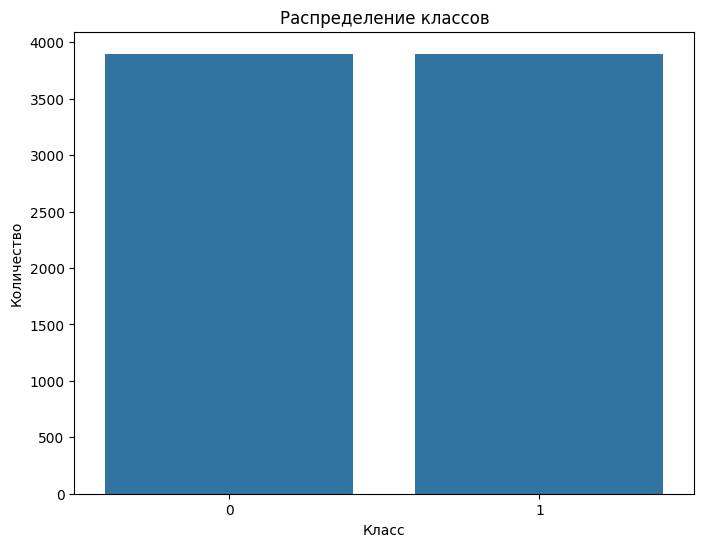

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_smote)
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

# SMOTE сделал свое грязное дело, теперь класс сбалансирован

In [ ]:
# добавим Scaler для масштабирования
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def train_and_evaluate_model(model, model_name):
    # Используем масштабированные данные для обучения и предсказания
    cv_scores = cross_val_score(model, X_train_scaled, y_train_smote, cv=5, scoring='roc_auc')

    print(f"Model: {model_name}")
    print(f"Mean cross-validation roc_auc: {cv_scores.mean():.2f}")
    print("="*60)

    model.fit(X_train_scaled, y_train_smote)

    y_pred_test = model.predict(X_test_scaled)

    print(f"Test predictions for {model_name}:")
    print(y_pred_test)
    print("="*60)

In [ ]:
# пробуем разные модели, для сравнения продуктивности
models = {
    "Random Forest Classifier": RandomForestClassifier(random_state=44),
    "Gaussian Process Classifier": GaussianProcessClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=0),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "Logistic Regression (Ridge Regularization)": LogisticRegression(penalty='l2', solver='liblinear')  # Ridge
}

In [ ]:
for model_name, model in models.items():
    train_and_evaluate_model(model, model_name)

Model: Random Forest Classifier
Mean cross-validation f1: 0.92
Test predictions for Random Forest Classifier:
[0 1 0 ... 1 1 0]
Model: Gaussian Process Classifier
Mean cross-validation f1: 0.87
Test predictions for Gaussian Process Classifier:
[0 1 1 ... 1 1 0]
Model: K-Neighbors Classifier
Mean cross-validation f1: 0.87
Test predictions for K-Neighbors Classifier:
[1 1 1 ... 1 1 0]
Model: Decision Tree Classifier
Mean cross-validation f1: 0.79
Test predictions for Decision Tree Classifier:
[0 1 0 ... 1 1 0]
Model: CatBoost Classifier
Mean cross-validation f1: 0.92
Test predictions for CatBoost Classifier:
[0 1 1 ... 1 1 0]
Model: Gradient Boosting Classifier
Mean cross-validation f1: 0.90
Test predictions for Gradient Boosting Classifier:
[0 1 1 ... 1 1 0]
Model: Ridge Classifier
Mean cross-validation f1: 0.88
Test predictions for Ridge Classifier:
[0 1 1 ... 1 1 0]
Model: Logistic Regression (Ridge Regularization)
Mean cross-validation f1: 0.88
Test predictions for Logistic Regressio

⭕ Логистическая регрессия - прогоняем гиперпараметры.

Best C: 0.1

Best ROC-AUC from cross-validation: 0.8845

In [ ]:
log_reg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

param_grid = {
    'C': [10, 1, 0.1],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train_smote)

best_model = grid_search.best_estimator_

print(f"Best C: {grid_search.best_params_['C']}")
print(f"Best ROC-AUC from cross-validation: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best C: 0.1
Best ROC-AUC from cross-validation: 0.8845


❎ Сырой КАТБУСТ (Боже, Храни Катбууст) - с переданными катфичами, 0 обработки

Model: CatBoost Classifier
Mean cross-validation f1: 0.73

❎ Набор моделек (Обработка: все категориальные преобразованы в бинарки, энкоуд через дамми-вальюс, НАНы заменены на среднее, плюс СМОУТ)
 Model: Random Forest Classifier
Mean cross-validation f1: 0.83

Model: Gaussian Process Classifier
Mean cross-validation f1: 0.79

Model: K-Neighbors Classifier
Mean cross-validation f1: 0.77

Model: Decision Tree Classifier
Mean cross-validation f1: 0.78

Model: CatBoost Classifier
Mean cross-validation f1: 0.83

Model: Gradient Boosting Classifier
Mean cross-validation f1: 0.82

ИТОГ: метрика на +0.10 for Catboost

❎ Набор моделек (Обработка: НАНы заменены на моду, немного потюнила выбросы)
Не изменилось НИ-ЧЕ-ГО

❎ Набор моделек (В обработку добавили - дроп TotalSpent (мультиколлинеарность), Масштабирование через scaler, ridge-регуляризация для логистической регрессии с пенальти):
Model: Random Forest Classifier
Mean cross-validation f1: 0.83 (no changes)

Model: Gaussian Process Classifier
Mean cross-validation f1: 0.83 (+0.04)

Model: K-Neighbors Classifier
Mean cross-validation f1: 0.80 (+0.03)

Model: Decision Tree Classifier
Mean cross-validation f1: 0.79 (+0.01)

Model: CatBoost Classifier
Mean cross-validation f1: 0.83 (catboostu pohuyu on itak prekrasen)

Model: Gradient Boosting Classifier
Mean cross-validation f1: 0.82 (no changes)

Model: Ridge Classifier
Mean cross-validation f1: 0.81 (NEW)

Model: Logistic Regression (Ridge Regularization)
Mean cross-validation f1: 0.81 (NEW)

☢ ROC-AUC вашего решения равен 0.7440737808228032. Это дает вам 3.0 баллов. Чекни рок-аук на кросс-валидации, чтобы понять степень переобучения. Но походу она высокая шо ппц

✅ 15.10 -
1. попробовать дропнуть коррелированные с целевой фичей признаки (возьми абсолют валью) - фичи с abs(corr) < 0.1 дропнули f1, но тестовый roc-auc поднялся +0.1
2. Потюнить learning_rate, глубину и др параметры для catboost, он еще сыроват

ROC-AUC вашего решения равен 0.7585027308276507.

Это после дропа abs(corr) < 0.1

Model: Random Forest Classifier
Mean cross-validation f1: 0.92

Model: Gaussian Process Classifier
Mean cross-validation f1: 0.87

Model: K-Neighbors Classifier
Mean cross-validation f1: 0.87

Model: Decision Tree Classifier
Mean cross-validation f1: 0.79

Model: CatBoost Classifier
Mean cross-validation f1: 0.92

Model: Gradient Boosting Classifier
Mean cross-validation f1: 0.90

Model: Ridge Classifier
Mean cross-validation f1: 0.88

Model: Logistic Regression (Ridge Regularization)
Mean cross-validation f1: 0.89

💔 идея 15.10.2024 12:37

тк SexMale имеет abs(корреляцию) меньше 0.1

0.006370	-0.011733	0.006401	0.013207	0.002780	0.014605	-0.007771	-0.003035	-0.012985	-0.007417	...	-0.015698	-0.008325	1.000000	-0.002824	0.005958	0.012321	-0.011835	-0.006924	0.003415	0.012525

НЕ ИЗМЕНИЛОСЬ НИ-ЧЕ-ГО!!!!!!
Логистическая регрессия с Ridge поднялась на +0.01

❌ чуть позже перешла на roc-auc метрику

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

Данный тюн параметров Катбуса выдал результат на кросс-валидации: 0.9233,
на тесте степ - ROC-AUC вашего решения равен 0.7743625375690786.

❗ 00:19 16.10:
Catboost лучший рок-аук 0.9269 на кросс-валидации дропается до 0.77 на тесте <-> модель сильно **переобучена**!

Попробую уменьшить iterations, ограничить глубину деревьев, уменьшить скорость обучения, увеличить штраф с 0.5 до range(10,20,5), уменьгить random_strength, увеличить пенальти.

Best Parameters: {'sampling_unit': 'Object', 'sampling_frequency': 'PerTree', 'random_strength': 4, 'penalties_coefficient': 15, 'min_data_in_leaf': 30, 'learning_rate': 0.01, 'l2_leaf_reg': 20, 'iterations': 300, 'grow_policy': 'Depthwise', 'early_stopping_rounds': 50, 'depth': 5, 'border_count': 100, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2}

***Best ROC-AUC from cross-validation: 0.8771 <-> 0.8 Снижение скора на кросс-вал но МИНУС переобучение***

Fitting 5 folds for each of 192 candidates, totalling 960 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0:	learn: 0.6591375	total: 16.1ms	remaining: 4.81s
1:	learn: 0.6277339	total: 32.5ms	remaining: 4.84s
2:	learn: 0.6002437	total: 46ms	remaining: 4.55s
3:	learn: 0.5763639	total: 58.8ms	remaining: 4.35s
4:	learn: 0.5563411	total: 73.6ms	remaining: 4.34s
5:	learn: 0.5379021	total: 89.9ms	remaining: 4.41s
6:	learn: 0.5212555	total: 103ms	remaining: 4.31s
7:	learn: 0.5047835	total: 116ms	remaining: 4.23s
8:	learn: 0.4924414	total: 127ms	remaining: 4.09s
9:	learn: 0.4811409	total: 139ms	remaining: 4.04s
10:	learn: 0.4685366	total: 153ms	remaining: 4.03s
11:	learn: 0.4581946	total: 169ms	remaining: 4.05s
12:	learn: 0.4491525	total: 181ms	remaining: 3.99s
13:	learn: 0.4387871	total: 195ms	remaining: 3.99s
14:	learn: 0.4308510	total: 208ms	remaining: 3.94s
15:	learn: 0.4230412	total: 226ms	remaining: 4.01s
16:	learn: 0.4163294	total: 238ms	remaining: 3.96s
17:	learn: 0.4101863	total: 250ms	remaining: 3.92s
18:	learn: 0.4038480	total: 265ms	remaining: 3.91s
19:	learn: 0.3982814	total: 278ms	rem

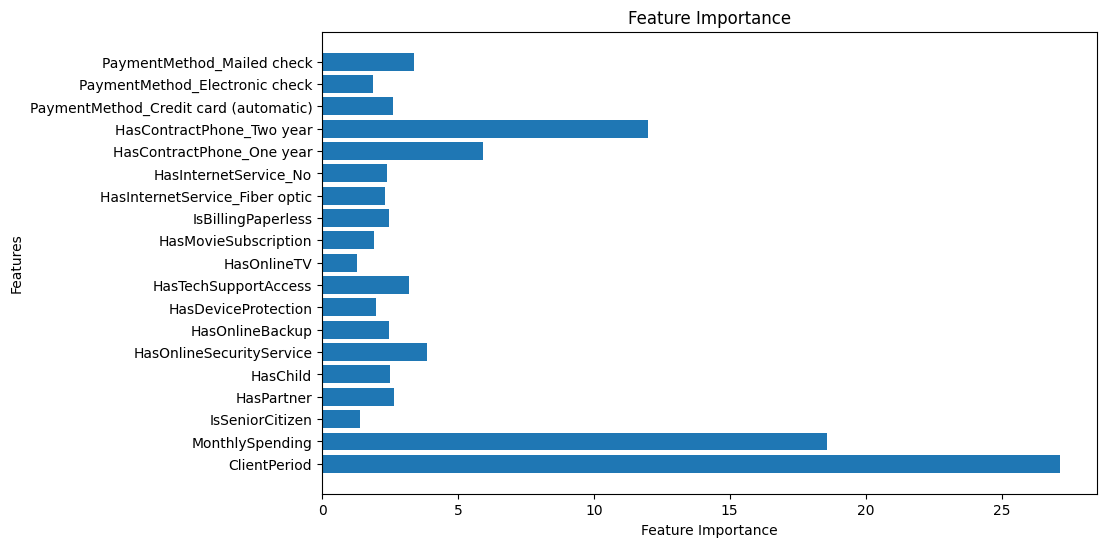

In [ ]:
# ТЮН параметров для катбуса, изначальный рок-аук 0.92
model_cat = CatBoostClassifier(verbose=1)

param_grid = {
    'iterations': range(100,600,200),
    'depth': range(1,16, 4),
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [0.5, 1, 3, 5],
    'border_count': [50, 100],
    'grow_policy': ['Depthwise']
}

grid_search = GridSearchCV(
    estimator=model_cat,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train_smote)

best_model_grid = grid_search.best_estimator_
best_params = grid_search.best_params_
feature_imp = best_model_grid.feature_importances_

y_pred_test_cat = best_model_grid.predict(X_test_scaled)


print(f"Best Model: {best_model_grid}")
print(f"Best Parameters: {best_params}")
print(f"Best ROC-AUC from cross-validation: {random_search.best_score_:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_imp)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# Предсказания

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/HW 3 Kaggle/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('/content/drive/MyDrive/HW 3 Kaggle/my_submission_12Cat.csv', index=False)

NameError: name 'pd' is not defined